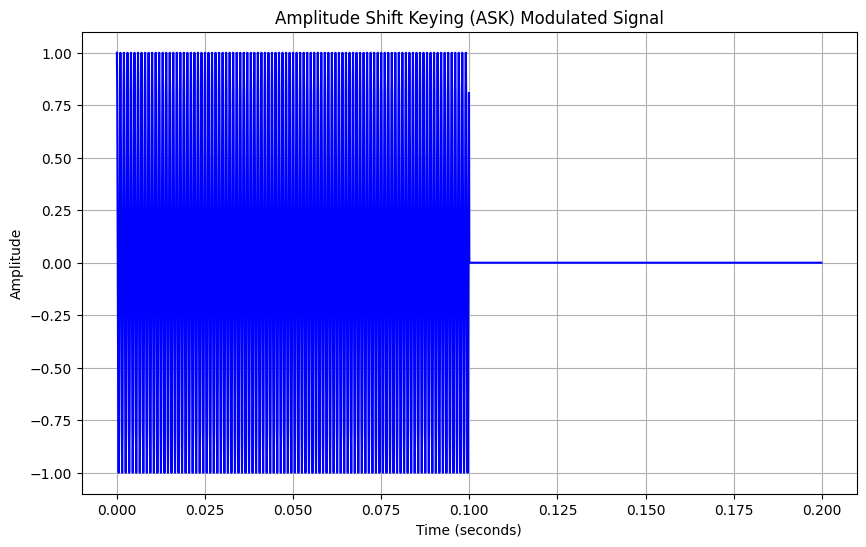

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def ask_modulate(data, carrier_freq, sampling_rate, bit_duration, amplitude=1):

    # Time vector for each bit
    t = np.arange(0, bit_duration * len(data), 1/sampling_rate)

    signal = np.zeros(len(t))
    bit_index = 0

    for i in range(len(t)):
        bit_period_start = int(bit_index * bit_duration * sampling_rate)
        bit_period_end = int((bit_index + 1) * bit_duration * sampling_rate)

        if i >= bit_period_start and i < bit_period_end:
            if data[bit_index] == 1:
                signal[i] = amplitude * np.cos(2 * np.pi * carrier_freq * (i / sampling_rate))  # Amplitude for '1'
            else:
                signal[i] = 0  # No signal for '0'

        if i == bit_period_end - 1:
            bit_index += 1

    return t, signal

# Example binary data (1's and 0's)
data = [1, 0, 1, 1, 0, 0, 1, 0, 1, 0]
carrier_freq = 1000  # 1 kHz carrier frequency
sampling_rate = 10000  # 10 kHz sampling rate
bit_duration = 0.1  # 0.1 seconds per bit

# Perform ASK modulation
t, modulated_signal = ask_modulate(data, carrier_freq, sampling_rate, bit_duration)

# Plot the modulated signal
plt.figure(figsize=(10, 6))
plt.plot(t[:2000], modulated_signal[:2000], label="ASK Modulated Signal", color="blue")  # First 2000 samples for better view
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Amplitude Shift Keying (ASK) Modulated Signal')
plt.grid(True)
plt.show()


In [4]:
def ask_demodulate(received_signal, carrier_freq, sampling_rate, bit_duration, threshold=0.5):


    decoded_data = []
    num_bits = len(received_signal) // int(bit_duration * sampling_rate)

    for bit_index in range(num_bits):
        bit_period_start = int(bit_index * bit_duration * sampling_rate)
        bit_period_end = int((bit_index + 1) * bit_duration * sampling_rate)

        # Extract the signal for the current bit period
        bit_signal = received_signal[bit_period_start:bit_period_end]

        # Compute the average amplitude of the signal in this bit period
        avg_amplitude = np.mean(np.abs(bit_signal))

        # Compare the average amplitude to the threshold to determine if it's 1 or 0
        if avg_amplitude > threshold:
            decoded_data.append(1)  # Assume bit is 1 if the signal is above the threshold
        else:
            decoded_data.append(0)  # Assume bit is 0 if the signal is below the threshold

    return decoded_data

# Simulate the received signal (in a real scenario, this would come from a communication channel)
received_signal = modulated_signal  # Assuming no noise for simplicity

# Perform ASK demodulation
decoded_data = ask_demodulate(received_signal, carrier_freq, sampling_rate, bit_duration)

# Output the decoded data
print("Decoded Data:", decoded_data)


Decoded Data: [1, 0, 1, 1, 0, 0, 1, 0, 1, 0]
